In [60]:
import pandas as pd
import numpy as np
import regex as re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from textblob import TextBlob
from matplotlib import pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


first manually upload csv file in colab

In [0]:
raw_data = pd.read_csv('/content/tweets.csv')

Adding a column name in dataframe

In [62]:
raw_data.columns = ['Timestamp','Tweet']
raw_data.head()

,Timestamp,Tweet
0,2020-06-06 15:16:02,b'YALGAAR KO FATKAAR trailer || YALGAAR REAC...
1,2020-06-06 15:10:28,"b'So much to think\xf0\x9f\x92\xad, to do, to ..."
2,2020-06-06 15:05:23,"b""Hey everyone, help me to reach 1k subscriber..."
3,2020-06-06 15:03:44,b'Carry - The Taste of India\n\n#carryminati #...
4,2020-06-06 15:03:21,"b""@swatic12 I don't know what will I say but #..."


**preprocessing the data**

In [63]:
#removing 'b' from starting
raw_data['clean_tweet'] = raw_data['Tweet'].str[1:]
raw_data.head()

,Timestamp,Tweet,clean_tweet
0,2020-06-06 15:16:02,b'YALGAAR KO FATKAAR trailer || YALGAAR REAC...,'YALGAAR KO FATKAAR trailer || YALGAAR REACT...
1,2020-06-06 15:10:28,"b'So much to think\xf0\x9f\x92\xad, to do, to ...","'So much to think\xf0\x9f\x92\xad, to do, to p..."
2,2020-06-06 15:05:23,"b""Hey everyone, help me to reach 1k subscriber...","""Hey everyone, help me to reach 1k subscribers..."
3,2020-06-06 15:03:44,b'Carry - The Taste of India\n\n#carryminati #...,'Carry - The Taste of India\n\n#carryminati #Y...
4,2020-06-06 15:03:21,"b""@swatic12 I don't know what will I say but #...","""@swatic12 I don't know what will I say but #y..."


removing RT and '@' and numbers 
(assuming numbers are not important in our case)

In [64]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text
raw_data['clean_tweet'] = np.vectorize(remove_pattern)(raw_data['clean_tweet'], "@[\w]*: | *RT*")
raw_data['clean_tweet'] = np.vectorize(remove_pattern)(raw_data['clean_tweet'], "@[A-Za-z0-9]+")
raw_data['clean_tweet'] = raw_data['clean_tweet'].str.replace("[^a-zA-Z# ]", "")
raw_data.head(10)

,Timestamp,Tweet,clean_tweet
0,2020-06-06 15:16:02,b'YALGAAR KO FATKAAR trailer || YALGAAR REAC...,YALGAA KO FATKAA trailer YALGAA EACTIONS C...
1,2020-06-06 15:10:28,"b'So much to think\xf0\x9f\x92\xad, to do, to ...",So much to thinkxfxfxxad to do to produce to a...
2,2020-06-06 15:05:23,"b""Hey everyone, help me to reach 1k subscriber...",Hey everyone help me to reach k subscribers Su...
3,2020-06-06 15:03:44,b'Carry - The Taste of India\n\n#carryminati #...,Carry The Taste of Indiann#carryminati #Yalga...
4,2020-06-06 15:03:21,"b""@swatic12 I don't know what will I say but #...",I dont know what will I say but #yalgaarho wi...
5,2020-06-06 15:02:14,b'Thanx for the best gift\xf0\x9f\x92\xaa\xf0\...,Thanx for the best giftxfxfxxaaxfxfxxaxexdxaxe...
6,2020-06-06 14:56:05,b'New Video LIVE. Check it out \xf0\x9f\x91\x8...,New Video LIVE Check it out xfxfxx nnYouTube V...
7,2020-06-06 14:48:55,"b""RT @myshutterlove: If you ask my opinion ab...",If you ask my opinion about YouTube vs TikTo...
8,2020-06-06 14:44:51,b'About 100 times watched #YAALGAR #carryminat...,About times watched #YAALGA #carryminati n n#...
9,2020-06-06 14:36:35,b'RT @shadatsdayout: #Top3 Best #INTRO &amp; #...,#Top Best #INTO amp #Outro Making #Apps for y...


removing stopwords

In [65]:
stopwords_set = set(stopwords.words("english"))
cleaned_tweets = []

for index, row in raw_data.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.clean_tweet.split() if not word in stopwords_set]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))

raw_data['clean_tweet'] = cleaned_tweets
raw_data.head()

,Timestamp,Tweet,clean_tweet
0,2020-06-06 15:16:02,b'YALGAAR KO FATKAAR trailer || YALGAAR REAC...,YALGAA KO FATKAA trailer YALGAA EACTIONS CAYMI...
1,2020-06-06 15:10:28,"b'So much to think\xf0\x9f\x92\xad, to do, to ...",So much thinkxfxfxxad produce acquire enquire ...
2,2020-06-06 15:05:23,"b""Hey everyone, help me to reach 1k subscriber...",Hey everyone help reach k subscribers Subscrib...
3,2020-06-06 15:03:44,b'Carry - The Taste of India\n\n#carryminati #...,Carry The Taste Indiann#carryminati #Yalgaar #...
4,2020-06-06 15:03:21,"b""@swatic12 I don't know what will I say but #...",I dont know I say #yalgaarho definitely suit s...


lemmitization and tokenization


In [66]:
tokenized_tweet = raw_data['clean_tweet'].apply(lambda x: x.split())
word_lemmatizer = WordNetLemmatizer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
#joining words into sentences 
for i, tokens in enumerate(tokenized_tweet):
    tokenized_tweet[i] = ' '.join(tokens)

raw_data['clean_tweet'] = tokenized_tweet
raw_data.head()

,Timestamp,Tweet,clean_tweet
0,2020-06-06 15:16:02,b'YALGAAR KO FATKAAR trailer || YALGAAR REAC...,YALGAA KO FATKAA trailer YALGAA EACTIONS CAYMI...
1,2020-06-06 15:10:28,"b'So much to think\xf0\x9f\x92\xad, to do, to ...",So much thinkxfxfxxad produce acquire enquire ...
2,2020-06-06 15:05:23,"b""Hey everyone, help me to reach 1k subscriber...",Hey everyone help reach k subscriber Subscribe...
3,2020-06-06 15:03:44,b'Carry - The Taste of India\n\n#carryminati #...,Carry The Taste Indiann#carryminati #Yalgaar #...
4,2020-06-06 15:03:21,"b""@swatic12 I don't know what will I say but #...",I dont know I say #yalgaarho definitely suit s...


sentiment analysis using textblob


In [67]:
sentiment=[]
for i in range(len(raw_data['clean_tweet'])):
  sent = TextBlob(raw_data['clean_tweet'][i])
  if (sent.sentiment.polarity > 0.0):
    res = "pos"
  elif (sent.sentiment.polarity <= 0.0):
    res = "Neg"

  sentiment.append(res)
raw_data['Sentiment'] = sentiment
raw_data.head()
  

,Timestamp,Tweet,clean_tweet,Sentiment
0,2020-06-06 15:16:02,b'YALGAAR KO FATKAAR trailer || YALGAAR REAC...,YALGAA KO FATKAA trailer YALGAA EACTIONS CAYMI...,Neg
1,2020-06-06 15:10:28,"b'So much to think\xf0\x9f\x92\xad, to do, to ...",So much thinkxfxfxxad produce acquire enquire ...,pos
2,2020-06-06 15:05:23,"b""Hey everyone, help me to reach 1k subscriber...",Hey everyone help reach k subscriber Subscribe...,Neg
3,2020-06-06 15:03:44,b'Carry - The Taste of India\n\n#carryminati #...,Carry The Taste Indiann#carryminati #Yalgaar #...,Neg
4,2020-06-06 15:03:21,"b""@swatic12 I don't know what will I say but #...",I dont know I say #yalgaarho definitely suit s...,pos


In [68]:
fig=raw_data['Sentiment'].value_counts()
print("----sentiments----")
print(fig)

----sentiments----
Neg    981
pos    534
Name: Sentiment, dtype: int64


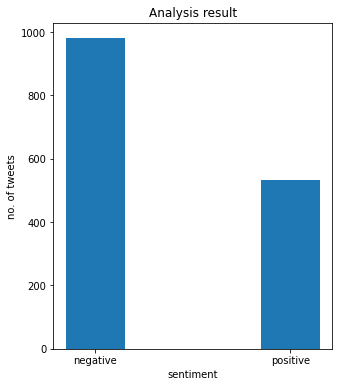

In [69]:
sent_type=['negative','positive']
sent_count=[fig[0],fig[1]]
plt.figure(figsize=(5,6))
plt.bar(sent_type,sent_count,width=0.3)
plt.title('Analysis result')
plt.xlabel('sentiment')
plt.ylabel('no. of tweets')
plt.show()

**another analysis**

In [70]:
data2=pd.read_csv('/content/tweets2.csv')
data2.columns = ['Timestamp','Tweet']
data2.head()

,Timestamp,Tweet
0,2020-06-06 15:23:25,b'What sport are you playing the most during l...
1,2020-06-06 15:23:24,"b'RT @Charlotte3003G: Well Robert, funny you s..."
2,2020-06-06 15:23:21,"b'However important they are, #BlackLivesMatte..."
3,2020-06-06 15:23:05,"b""@Lisaismyname89 It's #True - read about it h..."
4,2020-06-06 15:23:01,b'RT @sohosocietyw1: Checkout open air photoph...


preprocessing

In [71]:
#removing b from starting
data2['clean_tweet'] = data2['Tweet'].str[1:]
data2['clean_tweet'] = np.vectorize(remove_pattern)(data2['clean_tweet'], "@[\w]*: | *RT*")
data2['clean_tweet'] = np.vectorize(remove_pattern)(data2['clean_tweet'], "@[A-Za-z0-9]+")
data2['clean_tweet'] = data2['clean_tweet'].str.replace("[^a-zA-Z# ]", "")
data2

,Timestamp,Tweet,clean_tweet
0,2020-06-06 15:23:25,b'What sport are you playing the most during l...,What sport are you playing the most during loc...
1,2020-06-06 15:23:24,"b'RT @Charlotte3003G: Well Robert, funny you s...",Wellobert funny you should ask because the wa...
2,2020-06-06 15:23:21,"b'However important they are, #BlackLivesMatte...",However important they are #BlackLivesMatter p...
3,2020-06-06 15:23:05,"b""@Lisaismyname89 It's #True - read about it h...",Its #True read about it here via #WorldHealt...
4,2020-06-06 15:23:01,b'RT @sohosocietyw1: Checkout open air photoph...,Checkout open air photophay exhibition happen...
...,...,...,...
13753,2020-06-05 21:50:20,"b""The South West of England\xe2\x80\x99s 'R' r...",The South West of Englandxexxs rate has risen...
13754,2020-06-05 21:50:18,"b""@piersmorgan @flintoff11 F**k sake Piers. Fo...",Fk sake Piers For months youve multiple orga...
13755,2020-06-05 21:50:11,b'RT @MartinTolhurst1: We love hearing back fr...,We love hearing back from our clients In term...
13756,2020-06-05 21:50:02,b'RT @Bluestockingmum: I see #BorisHasFailedTh...,I see #BorisHasFailedTheNation is trending ag...


In [72]:
cleaned_tweets = []

for index, row in data2.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.clean_tweet.split() if not word in stopwords_set]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))

data2['clean_tweet'] = cleaned_tweets
data2.head()

,Timestamp,Tweet,clean_tweet
0,2020-06-06 15:23:25,b'What sport are you playing the most during l...,What sport playing lockdown From sports allowe...
1,2020-06-06 15:23:24,"b'RT @Charlotte3003G: Well Robert, funny you s...",Wellobert funny ask way guarantee second wave ...
2,2020-06-06 15:23:21,"b'However important they are, #BlackLivesMatte...",However important #BlackLivesMatter protests m...
3,2020-06-06 15:23:05,"b""@Lisaismyname89 It's #True - read about it h...",Its #True read via #WorldHealthOrganization #W...
4,2020-06-06 15:23:01,b'RT @sohosocietyw1: Checkout open air photoph...,Checkout open air photophay exhibition happeni...


In [73]:
tokenized_tweet = data2['clean_tweet'].apply(lambda x: x.split())
word_lemmatizer = WordNetLemmatizer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
#joining words into sentences 
for i, tokens in enumerate(tokenized_tweet):
    tokenized_tweet[i] = ' '.join(tokens)

data2['clean_tweet'] = tokenized_tweet
data2.head()

,Timestamp,Tweet,clean_tweet
0,2020-06-06 15:23:25,b'What sport are you playing the most during l...,What sport playing lockdown From sport allowed...
1,2020-06-06 15:23:24,"b'RT @Charlotte3003G: Well Robert, funny you s...",Wellobert funny ask way guarantee second wave ...
2,2020-06-06 15:23:21,"b'However important they are, #BlackLivesMatte...",However important #BlackLivesMatter protest mu...
3,2020-06-06 15:23:05,"b""@Lisaismyname89 It's #True - read about it h...",Its #True read via #WorldHealthOrganization #W...
4,2020-06-06 15:23:01,b'RT @sohosocietyw1: Checkout open air photoph...,Checkout open air photophay exhibition happeni...


In [74]:
sentiment=[]
for i in range(len(data2['clean_tweet'])):
  sent = TextBlob(data2['clean_tweet'][i])
  if (sent.sentiment.polarity > 0.0):
    res = "pos"
  elif (sent.sentiment.polarity <= 0.0):
    res = "Neg"

  sentiment.append(res)
data2['Sentiment'] = sentiment
data2.head()
  

,Timestamp,Tweet,clean_tweet,Sentiment
0,2020-06-06 15:23:25,b'What sport are you playing the most during l...,What sport playing lockdown From sport allowed...,Neg
1,2020-06-06 15:23:24,"b'RT @Charlotte3003G: Well Robert, funny you s...",Wellobert funny ask way guarantee second wave ...,pos
2,2020-06-06 15:23:21,"b'However important they are, #BlackLivesMatte...",However important #BlackLivesMatter protest mu...,pos
3,2020-06-06 15:23:05,"b""@Lisaismyname89 It's #True - read about it h...",Its #True read via #WorldHealthOrganization #W...,pos
4,2020-06-06 15:23:01,b'RT @sohosocietyw1: Checkout open air photoph...,Checkout open air photophay exhibition happeni...,Neg


In [75]:
fig2=data2['Sentiment'].value_counts()
print("----sentiments----")
print(fig2)

----sentiments----
Neg    8401
pos    5357
Name: Sentiment, dtype: int64


<function matplotlib.pyplot.show>

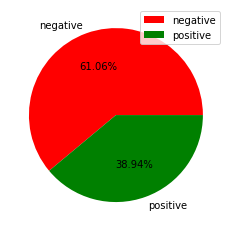

In [76]:
x=[fig2[0],fig2[1]]
plt.pie(x,labels=('negative','positive'),autopct='%1.2f%%',colors=['red','green'])
plt.legend(loc='best')
plt.show
